### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [1]:
# -- ВАШ КОД ТУТ
import numpy as np
import pandas as pd
import xarray.plot
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)
    ]).T


In [121]:
from matplotlib import pyplot as plt

%matplotlib inline

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
model = Ridge(alpha=0.02)
coef = model.fit(X,y).coef_
print(coef)


[ 1.01785600e+00  2.81843206e-01  1.60961708e-02 -4.81149276e-01
  2.62598997e-01 -5.82758285e-02  5.97282436e-03 -2.32833747e-04]


In [122]:
from matplotlib import pyplot as plt

%matplotlib inline

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
model = Lasso(alpha=0.02)
coef_2 = model.fit(X,y).coef_
print(coef_2)


[ 6.79093211e-01 -2.75100970e-01 -2.33259701e-02  4.54009999e-03
  6.51379285e-04  3.94371455e-05 -1.71190252e-06 -1.12298415e-06]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.415e+00, tolerance: 3.191e-03
  model = cd_fast.enet_coordinate_descent(


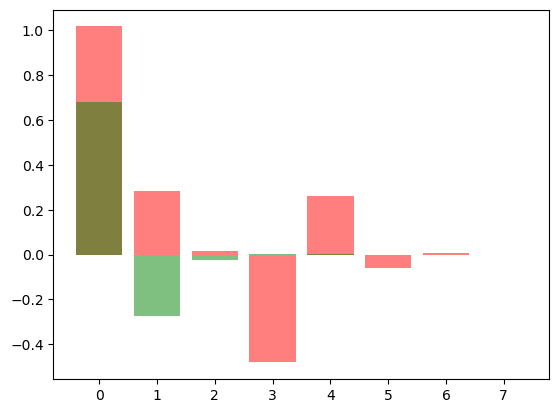

In [123]:
plt.bar(range(8), coef[:], color='red', alpha=0.5)
plt.bar(range(8), coef_2, color='green',alpha=0.5)
plt.show()

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!